### Q3 clustering using K-Means clustering
load BBC news data into pandas dataframe


In [17]:
# Import 
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
from sklearn import metrics
import pickle

### Read Gather data

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1824 entries, 1 to 2224
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   category  1824 non-null   object
 1   text      1824 non-null   object
dtypes: object(2)
memory usage: 42.8+ KB


In [20]:
df

,category,text
1,business,worldcom boss left books alone former worldc...
2,sport,tigers wary of farrell gamble leicester say ...
3,sport,yeading face newcastle in fa cup premiership s...
4,entertainment,ocean s twelve raids box office ocean s twelve...
5,politics,howard hits back at mongrel jibe michael howar...
...,...,...
2220,business,cars pull down us retail figures us retail sal...
2221,politics,kilroy unveils immigration policy ex-chatshow ...
2222,entertainment,rem announce new glasgow concert us band rem h...
2223,politics,how political squabbles snowball it s become c...


In [21]:
df = pd.read_csv('bbcnews.csv')
print(df.shape, df['category'].nunique())
df.head()

(1824, 2) 4


,category,text
0,business,worldcom boss left books alone former worldc...
1,sport,tigers wary of farrell gamble leicester say ...
2,sport,yeading face newcastle in fa cup premiership s...
3,entertainment,ocean s twelve raids box office ocean s twelve...
4,politics,howard hits back at mongrel jibe michael howar...


## Check the news categories and the number of samples for each category

In [24]:
df['category'].value_counts()

category
sport            511
business         510
politics         417
entertainment    386
Name: count, dtype: int64

In [26]:
print(df.shape, df['category'].nunique())

(1824, 2) 4


### Feature extraction
 extrect text into features of vector of numeric representation using TfidfVectorizer from Scikit Learn

In [27]:
vec = TfidfVectorizer()
features= vec.fit_transform(df['text'])
print("Input features shape:", features.shape)
print(f"\nTake a look at the features extracted from the first news article:\n{features[0].toarray()}")

Input features shape: (1824, 25832)

Take a look at the features extracted from the first news article:
[[0.         0.02406523 0.         ... 0.         0.         0.        ]]


##  K-Means clustering to the extracted features, and assign each news article to assigned cluster.

In [28]:
from sklearn.cluster import KMeans
kmeans = KMeans(4, n_init=10, random_state=42)
kmeans.fit(features)
df['cluster'] = kmeans.labels_

In [29]:
df.head(20)

,category,text,cluster
0,business,worldcom boss left books alone former worldc...,0
1,sport,tigers wary of farrell gamble leicester say ...,3
2,sport,yeading face newcastle in fa cup premiership s...,3
3,entertainment,ocean s twelve raids box office ocean s twelve...,1
4,politics,howard hits back at mongrel jibe michael howar...,2
5,politics,blair prepares to name poll date tony blair is...,2
6,sport,henman hopes ended in dubai third seed tim hen...,3
7,sport,wilkinson fit to face edinburgh england captai...,3
8,entertainment,last star wars not for children the sixth an...,1
9,entertainment,berlin cheers for anti-nazi film a german movi...,1


In [30]:
for cat in df['category'].unique():
    mark = df['category'] == cat
    print(f"{cat}\n{df[mark]['cluster'].value_counts()}\n")

business
cluster
0    497
2     12
3      1
Name: count, dtype: int64

sport
cluster
3    493
0     15
1      3
Name: count, dtype: int64

entertainment
cluster
1    244
0    113
3     24
2      5
Name: count, dtype: int64

politics
cluster
2    340
0     72
3      5
Name: count, dtype: int64



In [31]:
#encode text into tfidf vectors
cluster_to_category = {}
for cat in df['category'].unique():
    mark = df['category'] == cat
    top = df[mark]['cluster'].value_counts().head(1)
    count = top.values[0]
    cluster = top.index[0]
    print(f"{cat}:\n Top cluster number: {cluster}, Number of samples: {count}")
    cluster_to_category[cluster] = cat

print("\nMap cluster number to category:")
cluster_to_category

business:
 Top cluster number: 0, Number of samples: 497
sport:
 Top cluster number: 3, Number of samples: 493
entertainment:
 Top cluster number: 1, Number of samples: 244
politics:
 Top cluster number: 2, Number of samples: 340

Map cluster number to category:


{0: 'business', 3: 'sport', 1: 'entertainment', 2: 'politics'}

## clustered_category to data frame

In [32]:
df['clustered_category'] = df['cluster'].map(cluster_to_category)
df.head(20)

,category,text,cluster,clustered_category
0,business,worldcom boss left books alone former worldc...,0,business
1,sport,tigers wary of farrell gamble leicester say ...,3,sport
2,sport,yeading face newcastle in fa cup premiership s...,3,sport
3,entertainment,ocean s twelve raids box office ocean s twelve...,1,entertainment
4,politics,howard hits back at mongrel jibe michael howar...,2,politics
5,politics,blair prepares to name poll date tony blair is...,2,politics
6,sport,henman hopes ended in dubai third seed tim hen...,3,sport
7,sport,wilkinson fit to face edinburgh england captai...,3,sport
8,entertainment,last star wars not for children the sixth an...,1,entertainment
9,entertainment,berlin cheers for anti-nazi film a german movi...,1,entertainment


Check how accurate K-Means clustering group articles into clusters corresponding to the categories

In [33]:
print('Overall accuracy of clustered categories:', np.mean(df['category'] == df['clustered_category']))

Overall accuracy of clustered categories: 0.8629385964912281


In [34]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
feature_pca = pca.fit_transform(features.toarray())
feature_pca.shape

(1824, 2)

In [35]:
feature_pca

array([[-0.01711873, -0.0166068 ],
       [ 0.03045952,  0.11175474],
       [-0.14749914,  0.10994622],
       ...,
       [-0.07417335,  0.00401538],
       [ 0.1369483 ,  0.04463449],
       [ 0.03130243,  0.15024574]])

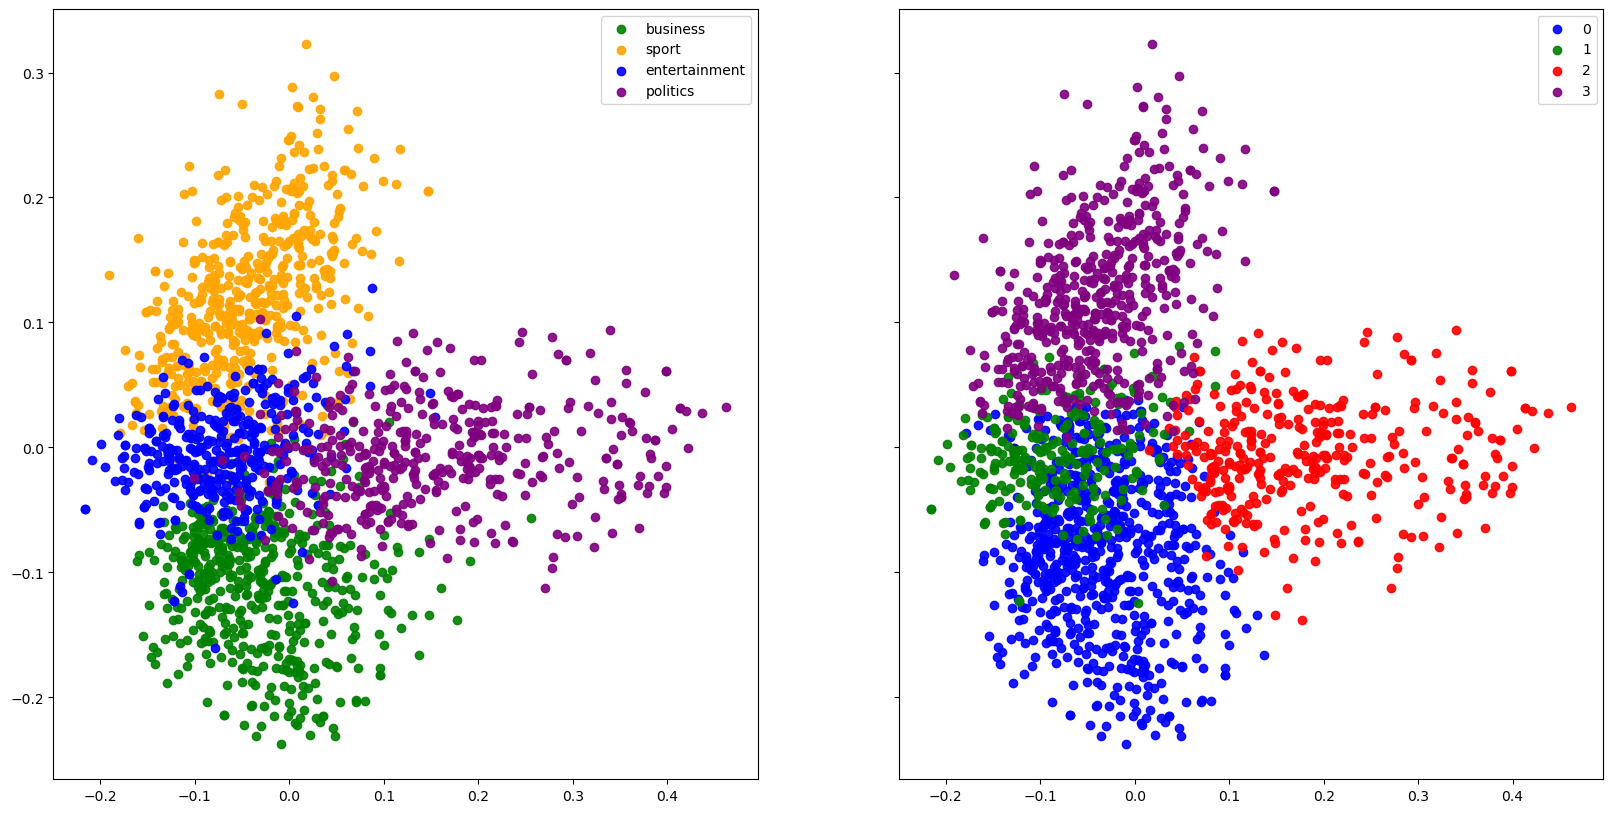

In [36]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, sharey=True, figsize=(20, 10))

categories = df['category'].unique()
colors = ['brown', 'orange', 'blue', 'purple']
for i, e in enumerate(categories):
    mark = df['category'] == e
    axes[0].scatter(feature_pca[:, 0][mark], feature_pca[:, 1][mark], color=colors[i], label=e, alpha=0.9)
axes[0].legend()

# Use the same set of colors as above to compare side by side of the two graphs
colors = ['blue', 'green', 'red', 'purple']
for e in set(kmeans.labels_):
    mark = kmeans.labels_ == e
    axes[1].scatter(feature_pca[:, 0][mark], feature_pca[:, 1][mark], color=colors[e], label=e, alpha=0.9)
axes[1].legend()

plt.show()

## Building  and training the model pipelineion

In [38]:
X_train, X_test, y_train, y_test = train_test_split(
    df['text'], df['category'], test_size=.2, stratify=df['category'], random_state=42)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(1459,) (365,) (1459,) (365,)


In [39]:
def svc_pipleline():
    return Pipeline(
        [
            (
                "tfidf_vector_com",
                TfidfVectorizer(
                    input="content",  # Modify this line
                    norm="l2",
                    max_features=None,
                    sublinear_tf=True,
                    stop_words="english",
                ),
            ),
            (
                "clf",
                SVC(
                    C=10,
                    kernel="rbf",
                    gamma=0.1,
                    probability=True,
                    class_weight=None,
                ),
            ),
        ]
    )
def sgd_pipeline():
    return Pipeline(
        [
            (
                "tfidf_vector_com",
                TfidfVectorizer(
                    input="content",
                    norm="l2",
                    max_features=None,
                    sublinear_tf=True,
                    stop_words="english",
                ),
            ),
            (
                "clf",

                
                SGDClassifier(
                    loss="log_loss",
                    penalty="l2",
                    class_weight='balanced',
                    tol=0.001,

                    


                    
                ),
            ),
        ]
    )


In [40]:
def print_metrics(pred_test, y_test, pred_train, y_train):
    print("test accuracy", str(np.mean(pred_test == y_test)))
    print("train accuracy", str(np.mean(pred_train == y_train)))
    print("\n Metrics and Confusion for SVM \n")
    print(metrics.confusion_matrix(y_test, pred_test))
    print(metrics.classification_report(y_test, pred_test))

In [41]:
%%time
svc_pipe = svc_pipleline()
svc_pipe.fit(X_train, y_train)
pred_test = svc_pipe.predict(X_test)
pred_train = svc_pipe.predict(X_train)
print_metrics(pred_test, y_test, pred_train, y_train)

test accuracy 0.9972602739726028
train accuracy 1.0

 Metrics and Confusion for SVM 

[[101   0   1   0]
 [  0  77   0   0]
 [  0   0  84   0]
 [  0   0   0 102]]
               precision    recall  f1-score   support

     business       1.00      0.99      1.00       102
entertainment       1.00      1.00      1.00        77
     politics       0.99      1.00      0.99        84
        sport       1.00      1.00      1.00       102

     accuracy                           1.00       365
    macro avg       1.00      1.00      1.00       365
 weighted avg       1.00      1.00      1.00       365

CPU times: total: 1min 28s
Wall time: 1min 54s


In [42]:
%%time
sgd_pipe = sgd_pipeline()
sgd_pipe.fit(X_train, y_train)
pred_test = sgd_pipe.predict(X_test)
pred_train = sgd_pipe.predict(X_train)
print_metrics(pred_test, y_test, pred_train, y_train)


test accuracy 0.9945205479452055
train accuracy 1.0

 Metrics and Confusion for SVM 

[[100   0   2   0]
 [  0  77   0   0]
 [  0   0  84   0]
 [  0   0   0 102]]
               precision    recall  f1-score   support

     business       1.00      0.98      0.99       102
entertainment       1.00      1.00      1.00        77
     politics       0.98      1.00      0.99        84
        sport       1.00      1.00      1.00       102

     accuracy                           0.99       365
    macro avg       0.99      1.00      0.99       365
 weighted avg       0.99      0.99      0.99       365

CPU times: total: 5.72 s
Wall time: 8.76 s


In [43]:
with open('scikit_learn_sgd.pickle', 'wb') as f:
    pickle.dump(sgd_pipe, f)
    
with open('scikit_learn_svm.pickle', 'wb') as f:
    pickle.dump(svc_pipe, f)

In [44]:
import pickle

# Save sgd_pipe model to scikit_learn_sgd.pickle
with open('scikit_learn_sgd.pickle', 'wb') as f:
    pickle.dump(sgd_pipe, f)

# Save svc_pipe model to scikit_learn_svm.pickle
with open('scikit_learn_svm.pickle', 'wb') as f:
    pickle.dump(svc_pipe, f)

In [45]:
svc_pipe

Pipeline(steps=[('tfidf_vector_com',
                 TfidfVectorizer(stop_words='english', sublinear_tf=True)),
                ('clf', SVC(C=10, gamma=0.1, probability=True))])